<a href="https://colab.research.google.com/github/NickygenN1/SRCNN/blob/main/trainmodel_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/SRCNN')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import torch
from torch import nn
from dataset import train_dataloader
from train import train_model
from model import SRCNN
import matplotlib.pyplot as plt

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

SRCNN_Model = SRCNN(in_channels=3)
model = SRCNN(in_channels=3).to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.09, patience=10)
result = train_model(model, train_dataloader, optimizer, loss_fn, scheduler, epochs=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

 -- save model to ./model_checkpoint/model_mae_0.0596.pth with loss 0.0596
Epoch: 1 | train_loss: 0.0596 | 
 -- save model to ./model_checkpoint/model_mae_0.0311.pth with loss 0.0311
Epoch: 2 | train_loss: 0.0311 | 
 -- save model to ./model_checkpoint/model_mae_0.0232.pth with loss 0.0232
Epoch: 3 | train_loss: 0.0232 | 
 -- save model to ./model_checkpoint/model_mae_0.0149.pth with loss 0.0149
Epoch: 4 | train_loss: 0.0149 | 
 -- save model to ./model_checkpoint/model_mae_0.0121.pth with loss 0.0121
Epoch: 5 | train_loss: 0.0121 | 
Epoch: 6 | train_loss: 0.0124 | 
 -- save model to ./model_checkpoint/model_mae_0.0111.pth with loss 0.0111
Epoch: 7 | train_loss: 0.0111 | 
 -- save model to ./model_checkpoint/model_mae_0.0102.pth with loss 0.0102
Epoch: 8 | train_loss: 0.0102 | 
 -- save model to ./model_checkpoint/model_mae_0.0101.pth with loss 0.0101
Epoch: 9 | train_loss: 0.0101 | 
 -- save model to ./model_checkpoint/model_mae_0.0100.pth with loss 0.0100
Epoch: 10 | train_loss: 0.01

In [6]:
len(train_dataloader) # 8*49 --> 392 images

49

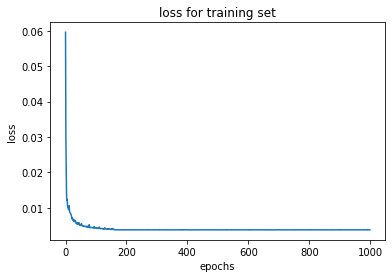

In [4]:
plt.plot([_ for _ in range(1000)], result['train_loss']);
plt.title('loss for training set')
plt.xlabel('epochs')
plt.ylabel('loss');